# Task 4.9: Ensemble Methods
    Boosting and Bagging Techniques

In this notebook we are going to implement ensemble methods including boosting and bagging techniques using built-in Scikit Library functions.
 You will be provided with some already complete code as well as some coding task that you should complete yourself. In particular, you will have to:

* complete the function `BaggingClassifierML(X_train, y_train, X_test, k)` that will make use of the pre-built implementation of Bagging techniques.
* complete the function `BoostingClassifierML(X_train, y_train, X_test, k)` that will make use of the pre-built implementation of Bagging techniques.
* Tune Number of estimator in ensemble methods
* Compare the ensemble methods with KNN



## 1.Import libraries
The required libraries for this notebook are pandas, sklearn, numpy and matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import *
import pandas as pd
from sklearn.datasets import  load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

## 2.Load the data
The data we are using is from iris dataset, which we can access directly from the scikit learn library . It consists of 150 data points and 4 features.

In [2]:
#add another column that contains the house prices which in scikit learn datasets are considered as target
irisData=load_iris() # get the data
print(irisData.data.shape) # shape of data: 150 data points and 4 features
print(irisData.feature_names)# Feature_names of data
irisData_df=pd.DataFrame(irisData.data,columns=irisData.feature_names) # convert the irisData.data to a a dataframe
irisData_df['Species']=irisData.target # there is no column called ‘Species’ in the data frame because the target column is available in another attribute called target
newX=irisData_df.drop('Species',axis=1) # All other features
newY=irisData_df['Species'] # Species types
irisData_df.head()


(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3) 
#test_size= should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#everytime you run it without specifying random_state, you will get a different result, this is expected behavior
#print (len(X_test), len(y_test))

print('train set: {}  | test set: {}'.format(round(((len(y_train)*1.0)/len(newX)),3),
                                                       round((len(y_test)*1.0)/len(newX),3)))


train set: 0.7  | test set: 0.3


## 3. Complete the function baggingClassifierML by using Bagging classifier built-in function.
Let's find how Bagging Classifier technique can be implemented using already available functions from the scikit-learn library.

In [4]:
def baggingClassifierML(X_train, y_train, X_test,k):

    #Create KNN object with a K coefficient
    bagmodel=BaggingClassifier(n_estimators=k,max_samples=0.5, max_features=4,random_state=1)
    bagmodel.fit(X_train, y_train) # Fit KNN model


    Y_pred = bagmodel.predict(X_test)
    #print (Y_pred)
    return Y_pred

## 4. Your task: Now compute the prediction accuracy score for Bagging technique
The accuracy score metric is as follows:
\begin{align}
accuracy(y,\hat{y})=\frac{1}{n}\sum_{i=1}^{n} 1(\hat{y}_i=y_i)
\end{align}

In [5]:
Y_pred=baggingClassifierML(X_train, y_train, X_test,9)
score=metrics.accuracy_score(y_test,Y_pred)
print(score)

0.9777777777777777


## 5. Complete the function boostingClassifierML by using Boosting classifier built-in function.

AdaBoost (Adaptive Boosting) is a very popular boosting technique that aims at combining multiple weak classifiers to build one strong classifier.
Let's find how adaptive Boosting Classifier technique can be implemented using already available functions from the scikit-learn library.

In [6]:
def boostingClassifierML(X_train, y_train, X_test,k):
    # AdaBoost takes Decision Tree as its base-estimator model by default.
    boostmodel=AdaBoostClassifier(n_estimators=k)
    boostmodel.fit(X_train , y_train,sample_weight=None) # Fit KNN model


    Y_pred = boostmodel.predict(X_test)
    #print (Y_pred)
    return Y_pred

## 6. Your task: Now compute the prediction accuracy score for AdaBoosting technique
The accuracy score metric is as follows:
\begin{align}
accuracy(y,\hat{y})=\frac{1}{n}\sum_{i=1}^{n} 1(\hat{y}_i=y_i)
\end{align}
Now Let's compute the accuracy metric for Adaboosting technique.

In [7]:
Y_pred1=boostingClassifierML(X_train, y_train, X_test, 9)
score1=metrics.accuracy_score(y_test,Y_pred1)
print(score1)

0.9333333333333333


## 7. Your task: Tune number of estimators
Plot the accuracy metric versus number of base estimator in boosting and bagging ensemble methods.
Tune the number of base estimator for better accuracy.

In [8]:
score_list=[]

for i in range(1,25):
    Y_pred_i=baggingClassifierML(X_train, y_train, X_test, i)
    score_list.append(metrics.accuracy_score(y_test,Y_pred_i))

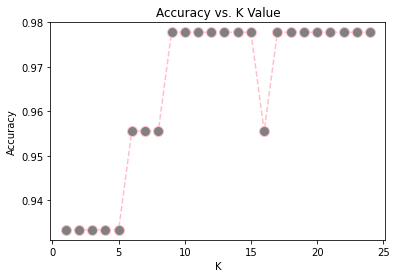

In [9]:
plt.plot(range(1,25),score_list,color='pink', linestyle='dashed', marker='o', markerfacecolor='grey',markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [10]:
score_list=[]

for i in range(1,25):
    Y_pred1_i=boostingClassifierML(X_train, y_train, X_test, i)
    score_list.append(metrics.accuracy_score(y_test,Y_pred1_i))

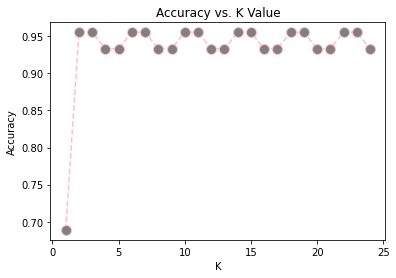

In [11]:
plt.plot(range(1,25),score_list,color='pink', linestyle='dashed', marker='o', markerfacecolor='grey',markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

## 8. Your task: Compare with KNN
As you know, ensemble methods including boosting and bagging are used for building a strong classifier.
Now, you should compare the result of ensemble methods with KNN in task 4.3 .

## Congrats!
Now you have learned how to implement Boosting and Bagging algorithms. There are of course various interesting points we do not cover here, such as  fine tuning various hyper-parameters of boosting and bagging algorithms. With the skills you learned above, you can try it yourselves.
You can also compare the ensemble methods with other base learners like Decision Tree and Random Forest.

